# Titanic - Machine Learning from Disaster
## Data Preprocessing
 

## Introduction

The Titanic Machine Learning Project explores one of history’s most dramatic events—the sinking of the Titanic—through the lens of data science. By analyzing this rich dataset, the project aims to uncover the factors that influenced passenger survival during the disaster.

### Objectives:
- **Exploratory Data Analysis (EDA):**  
  Gain insights into the data by examining survival rates across various features such as gender, age groups, passenger class, family size, and port of departure.  
- **Feature Engineering:**  
  Develop new features, such as 'FamilySize' and 'AgeGroup', to enhance the predictive power of the model and reveal hidden patterns in the dataset.
- **Correlation Analysis:**  
  Identify how numerical features, such as fare price and passenger class, correlate with survival, which helps in understanding the linear relationships and potential predictor importance.
- **Predictive Modeling:**  
  Build machine learning models that leverage the insights obtained from EDA to predict passenger survival outcomes with improved accuracy.

### Context and Relevance
This project not only deep dives into the historical context of the Titanic tragedy but also demonstrates the practical applications of data analysis and machine learning techniques. Techniques like heatmaps, bar plots, and statistical correlations are used to unravel the story behind the numbers, validating historical accounts like the "women and children first" policy that influenced evacuation procedures.

By integrating data visualization and predictive modeling, the Titanic Machine Learning Project sets a solid foundation for understanding how data-driven decisions can offer profound insights into real-world events.

Let's begin the analysis and explore what the data reveals about this historical tragedy.

## Imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## First Meet with the Data

In [15]:
train = pd.read_csv('train.csv')

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
train = train.rename(columns={"Pclass": "class", "Fare": "Tprice", "Embarked": "depCity"})
train.head()

,PassengerId,Survived,class,Name,Sex,Age,SibSp,Parch,Ticket,Tprice,Cabin,depCity
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
train

,PassengerId,Survived,class,Name,Sex,Age,SibSp,Parch,Ticket,Tprice,Cabin,depCity,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


# Policy Women and Children First

## Age Analysis

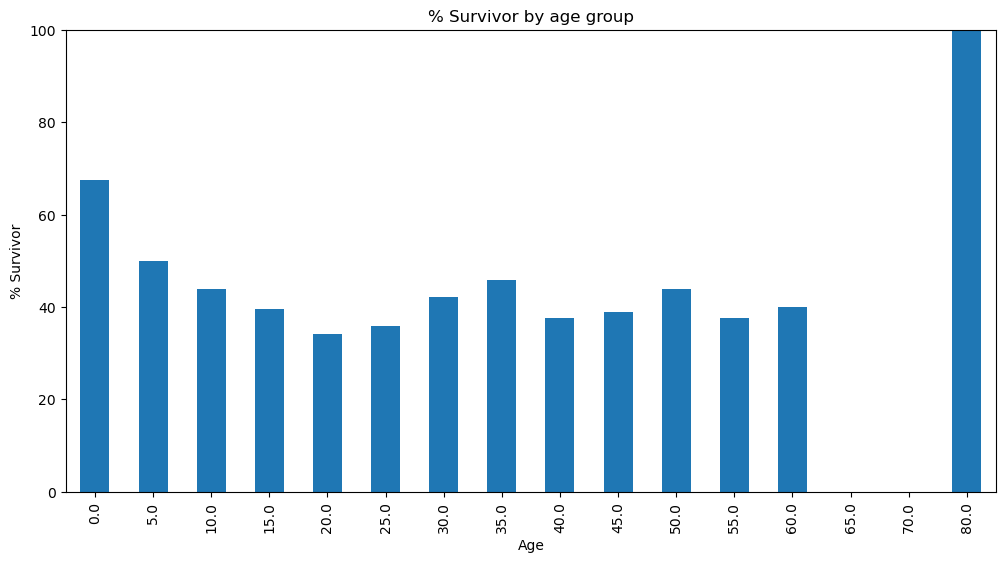

In [20]:
train['AgeGroup'] = (train['Age'] // 5) * 5
survival_rate = (train.groupby('AgeGroup')['Survived'].mean() * 100).round(1)

survival_rate.plot(kind='bar', figsize=(12, 6))
plt.title('% Survivor by age group')
plt.xlabel('Age')
plt.ylabel('% Survivor')
plt.ylim(0, 100)
plt.show()

## Rate of Survivor by Sex

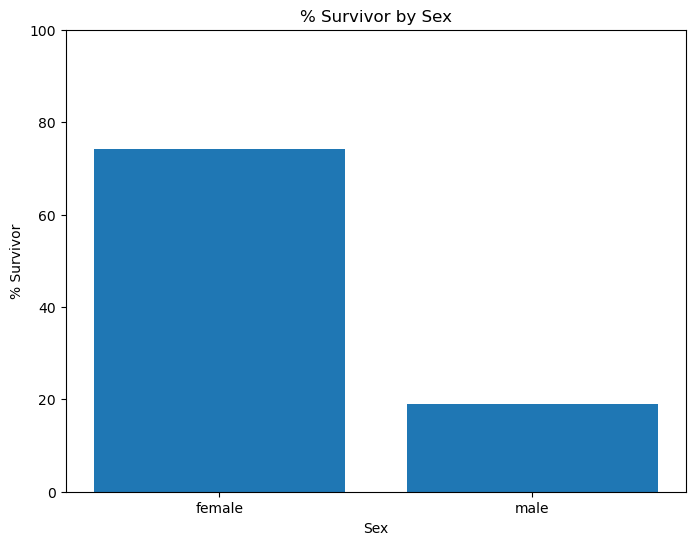

In [21]:
sex_survival_rate = (train.groupby('Sex')['Survived'].mean() * 100).round(1)

plt.figure(figsize=(8, 6))
plt.bar(sex_survival_rate.index, sex_survival_rate.values)
plt.title('% Survivor by Sex')
plt.xlabel('Sex')
plt.ylabel('% Survivor')
plt.ylim(0, 100)
plt.show()

## Conclusion: “Women and Children First” Policy

Based on the two analyses—survival rates by sex and by age group—the data strongly supports the historical “women and children first” principle:

1. **Sex-Based Survival**  
   - **Females** show a significantly higher survival percentage, exceeding 70%.  
   - **Males** have a much lower survival percentage, well below 20%.  
   This striking contrast aligns with prioritizing women for lifeboats.

2. **Age-Based Survival**  
   - **Children (especially ages 0–5)** demonstrate notably higher survival rates, suggesting they were given priority in evacuation.  
   - **Adults and the elderly** exhibit lower survival rates, reflecting that they were not prioritized in the same way.

Overall, these findings corroborate that the Titanic’s evacuation efforts were guided—or at least strongly influenced—by the “women and children first” policy, thus raising the survival chances for these groups relative to men and older adults.


# Class Analysis

In [22]:
train.groupby('class')['Survived'].mean()


class
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Conclusion
We can see that the higher class you had, the better chance of Survival
- First Class- 0.63%
- Second Class- 0.473%
- Third Class- 0.242%

# Family Size Analysis

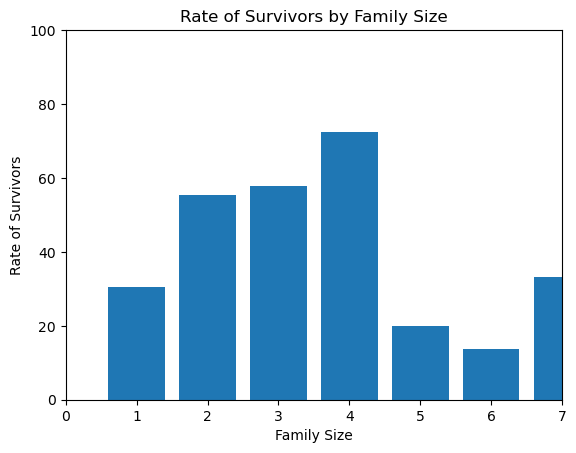

In [23]:
# Group by FamilySize and sum the survivors per size
survivors_by_family_size = (train.groupby('FamilySize')['Survived'].mean()*100).round(1)


plt.bar(survivors_by_family_size.index, survivors_by_family_size.values)
plt.xlabel('Family Size')
plt.ylabel('Rate of Survivors')
plt.title('Rate of Survivors by Family Size')
plt.ylim(0,100)
plt.xlim(0,7)
plt.show()


## Conclusion 

| Family Size | Survival Rate | Interpretation |
|-------------|------------------|----------------|
| **1 (IsAlone)** | **30 %** | Solo travellers had the poorest odds; lacking assistance likely hurt evacuation chances. |
| **2 – 3** | **55 – 60 %** | Travelling with one or two relatives roughly doubled survival compared with being alone, suggesting mutual help without crowding. |
| **4** | **75 % (peak)** | Small–medium families seem to have coordinated best, securing the highest lifeboat access. |
| **5 – 6** | **14 – 20 %** | Odds plunge for larger groups; keeping many members together probably slowed response and limited available seats. |
| **7 +** | **33 %** | A slight rebound, but the sample size is tiny—interpret cautiously. |

**Overall pattern:** survival rises sharply from size 1 to a sweet‑spot at size 4, then collapses for larger families. The relationship is clearly **non‑linear**.



# Departure City Anlysis

In [24]:
train.groupby('depCity')['Survived'].mean()


depCity
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

## Conclusion
We can see the diffrent rate of survivals from each city of departure
- Cherbourg- 0.554%
- Queenstown- 0.473%
- Southampton- 0.242%

## Correlatiob Heatmap

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


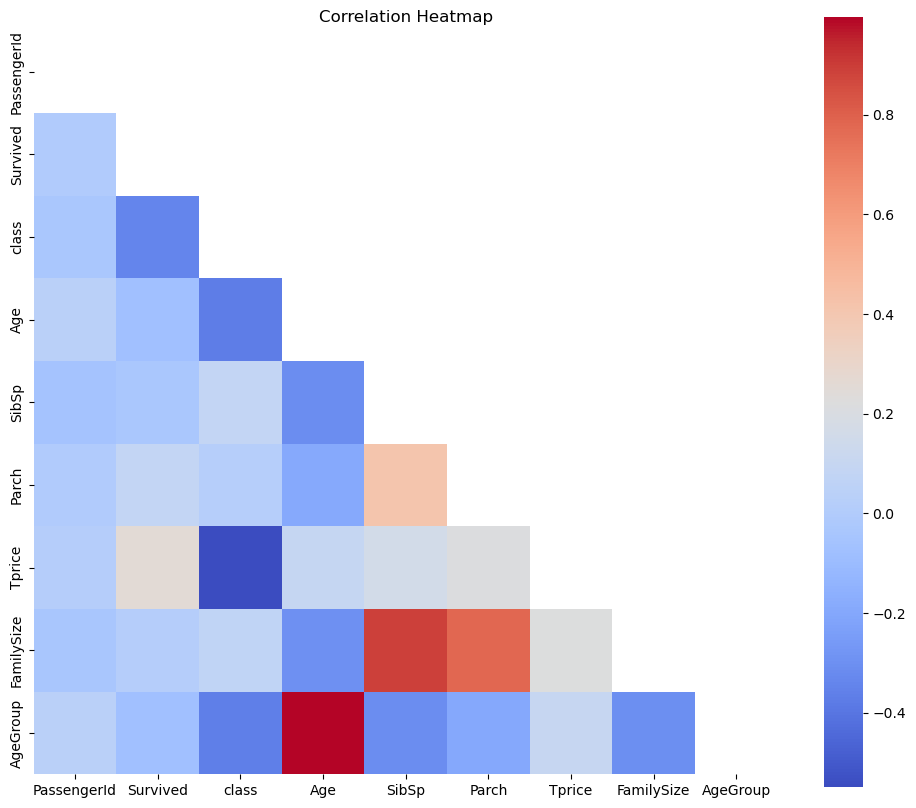

In [25]:
numeric_cols = train.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Conclusion

Based on the correlation heatmap, here are the key takeaways:

1. **Survival and Passenger Class**  
   - **Survived** is negatively correlated with **class** (remember that lower class numbers correspond to higher classes: 1 = First Class, 2 = Second Class, 3 = Third Class).  
   - This suggests that passengers in First Class (a lower numerical value) had a higher chance of survival.

2. **Survival and Fare (Tprice)**  
   - There is a positive correlation between **Survived** and **Tprice**.  
   - Passengers who paid higher fares, generally in First Class, usually had better survival odds.

3. **Age Features**  
   - **Age** and **AgeGroup** are highly correlated since they essentially capture the same information.  
   - While age itself does not show a very strong direct correlation with survival, it remains an important feature when combined with other variables.

4. **Family-Related Variables**  
   - **FamilySize** is strongly related to **SibSp** (siblings/spouses) and **Parch** (parents/children) because it represents the sum of these two.  
   - The direct correlation between **FamilySize** and **Survived** is modest, but deeper analysis (especially interactions with other variables) might reveal more about their relationship.

**Overall:**  
The heatmap confirms that higher passenger class and higher fares are linked to better survival rates. Age-related features are naturally connected, and family size, while not strongly correlated with survival on its own, could offer additional insights when analyzed in combination with other features.